In [1]:
import cmocean as cmo
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset
import seaborn as sns

In [2]:
# Load output
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
ds = open_mdsdataset(outdir, prefix=['eta'])

In [3]:
def plot_spectrogram2(ax,timeseries, X, col, lab,kind='linear', title='', xlim=[0,40]):
    samp_freq = 1/600 # 10 min data
    
    freq_per, Pxx_den_per = signal.periodogram(timeseries, samp_freq, detrend='constant', scaling='density')
        
    if kind == 'semilog':
        ax.semilogy(freq_per*(86400), Pxx_den_per,color=col, alpha=1, label=lab, linewidth=2)
    elif kind=='linear':
        ax.plot(freq_per*(86400), Pxx_den_per/1E4,color=col, alpha=1,linewidth=2)  
    else:
        raise Exception("%s is not a valid value for kind" %kind)
    #print((freq_per[1:]-freq_per[:-1])*86400)
    ax.legend()
    ax.set_xlim(xlim)
    ax.set_ylabel(r'PSD (10$^4$ cm$^2$Hz$^{-1}$)', labelpad=0.1)
    ax.set_xlabel('Frequency (cpd)', labelpad=0.1)
    ax.set_title(title)
    return ax

In [4]:
# Load grid variables and mask
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
depth = ds['Depth'][:]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


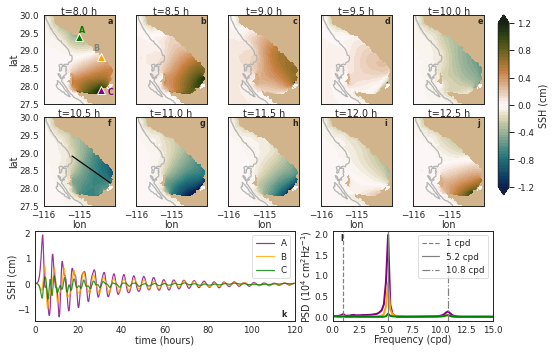

In [5]:
sns.set_context('paper')
sns.set_style('white')

cmap=cmo.cm.tarn_r
time = np.arange(0,720)*600
vmin = -1.2
vmax = 1.2
levs = np.linspace(vmin,vmax,60)
lon_inds = [428+59, 428+59, 428+20]
lat_inds = [61+3, 133, 175]
colors = ['purple', 'orange','green']

fig = plt.figure(figsize=(7.48,5))
gs1 = gridspec.GridSpec(2,5)
gs1.update(left=0.05,bottom=0.42, top=0.95, wspace=0.05, hspace=0.15)
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[0,1])
ax3 = plt.subplot(gs1[0,2])
ax4 = plt.subplot(gs1[0,3])
ax5 = plt.subplot(gs1[0,4])
ax6 = plt.subplot(gs1[1,0])
ax7 = plt.subplot(gs1[1,1])
ax8 = plt.subplot(gs1[1,2])
ax9 = plt.subplot(gs1[1,3])
ax10 = plt.subplot(gs1[1,4])

axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]
panel = ['a','b','c','d','e','f','g','h','i','j']
for tt, ax, pan in zip(range(48, 79, 3),axs, panel):
    ax.set_xlim(-116, -114)
    ax.set_ylim(27.5, 30)
    ax.set_facecolor('tan')

    eta = ds['ETAN'][tt,:,:]
    pc = ax.contourf(lon,lat, 
                     np.ma.masked_array(eta*100,mask=mask[0,:,:]),
                     levels=levs,
                     cmap=cmap, vmin=vmin, vmax=vmax, extend='both')
    ax.set_title('t=%1.1f h'%(time[tt]/3600), pad=0.3)
    ax.set_aspect(1)
    ax.contour(lon,lat, np.ma.masked_array(depth,mask=mask[0,:,:]), levels=[250],colors='0.7')
    ax.text(0.9,0.9,pan, transform=ax.transAxes, fontweight='bold', fontsize=8)
    
cbar_ax = fig.add_axes([0.91, 0.45, 0.02, 0.5]) 
cb = fig.colorbar(pc,
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.1f', label='SSH (cm)', pad=0,
                  extend='both', ticks=[-1.2,-0.8,-0.4,0,0.4,0.8,1.2])

for jj, col in zip(range(len(lon_inds)), colors):
    ax1.plot(lon[lon_inds[jj]],lat[lat_inds[jj]],'^',color=col, markeredgecolor='w', markersize=8)
ax1.text(0.5,0.8,'A',color=colors[2], fontsize=8, fontweight='bold',transform=ax1.transAxes)
ax1.text(0.7,0.6,'B',color='0.5',transform=ax1.transAxes,fontsize=8, fontweight='bold')
ax1.text(0.9,0.1,'C',color=colors[0],transform=ax1.transAxes,fontsize=8, fontweight='bold')

#ax6.plot([-115.07,-115.07],[27.83,29.4],color='gold')
ax6.plot([-115.2,-114.13],[28.9,28.15],color='k')


for ax in [ax1, ax6]:
    ax.set_ylabel('lat', labelpad=0.1)
for ax in [ax6,ax7,ax8,ax9, ax10]:
    ax.set_xlabel('lon', labelpad=0.1)
for ax in [ax2,ax3,ax4,ax5,ax7,ax8,ax9,ax10]:
    ax.set_yticks([])
for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_xticks([])
for ax in [ax1,ax6]:    
    ax.yaxis.set_tick_params(pad=-0.2)
for ax in [ax6,ax7,ax8,ax9,ax10]:
    ax.set_xticks([-116,-115])
    ax.xaxis.set_tick_params(pad=0)

# ------- time series ----------
gs2 = gridspec.GridSpec(1, 5, wspace=0.62)
gs2.update(left=0.05,bottom=0.1, top=0.35, hspace=0.05)
ax11 = plt.subplot(gs2[:3])

eta = ds['ETAN'][:,lat_inds[0],lon_inds[0]]
eta2 = ds['ETAN'][:,lat_inds[1],lon_inds[1]]
eta3 = ds['ETAN'][:,lat_inds[2],lon_inds[2]]

ax11.plot(time[:]/3600,eta*100,'purple', label='A' , alpha=0.8)
ax11.plot(time[:]/3600,eta2*100,'orange', label='B', alpha=0.8)
ax11.plot(time[:]/3600,eta3*100,'green', label='C', alpha=0.8)

ax11.set_xlim(0,24*5)
ax11.set_xlabel('time (hours)', labelpad=0.1)
ax11.set_ylabel('SSH (cm)', labelpad=0.1)
ax11.xaxis.set_tick_params(pad=0)
ax11.yaxis.set_tick_params(pad=0)
ax11.legend()    
ax11.text(0.95,0.05,'k', transform=ax11.transAxes, fontweight='bold', fontsize=8)
  
# ------- amplitude spectra -----
ax12 = plt.subplot(gs2[3:])
lat = ds.YC[:,0].data
lats = [lat[lat_inds[0]], lat[lat_inds[1]],lat[lat_inds[2]]]
kind = 'linear'
title = ''
labels=['A','B','C']
for ii, jj, col, latt, lab in zip(lon_inds, lat_inds, colors, lats, labels):
    timeseries = np.squeeze(ds['ETAN'][:,jj,ii])*100
    ax = plot_spectrogram2(ax12,timeseries[:],latt, col, lab,
                           kind=kind, title=title,xlim=[0,15])
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(10.8, linestyle='-.', color='0.5', label='10.8 cpd')
ax.legend()
ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=-0.2)
ax.text(0.05,0.9,'l', transform=ax.transAxes, fontweight='bold', fontsize=8)

# --------------------------------


plt.savefig('figure2.png', dpi=500, bbox_inches='tight')